## Project: WeRateDogs Data Wrangling

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Gathering data</a></li>
<li><a href="#assessing">Assessing data</a></li>
<li><a href="#cleaning">Cleaning data</a></li>
<li><a href="#storing">Storing, Analyzing and Visualizing data</a></li>
</ul>

## Introduction

In this project, I will gather, assess and clean Twitter posts from the WeRateDogs account. This account rates people's dogs with a humorous comment about each dog. This project will work with the posts, as well as with the images uploaded, and will factor in the number of "likes" and retweets each post has had.

## Gathering data

In [60]:
#Load Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
#!pip install tweepy
import os
import json

In [2]:
#Import and read input file
df_tw = pd.read_csv (r'C:\Users\jlasa001\Documents\Data Analytics Learning Path - Udacity\Wrangle and analyze data Project\twitter-archive-enhanced.csv')
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [3]:
#Creating folder using python
folder_name = 'Image_Predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

#Getting the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
#open('image_predictions.tsv', 'wb').write(r.content)
#Saving the file to the computer
with open(os.path.join(folder_name, url.split('/')[-1]),mode='wb') as file:
        file.write(r.content)

In [4]:
#Reading the image predictions DataFrame
df_image = pd.read_csv((r'C:\Users\jlasa001\Image_Predictions\image-predictions.tsv'), sep = '\t')
df_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [5]:
#Defining the keys
import tweepy

consumer_key = 
consumer_secret = 
access_token = 
access_secret = 

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)#,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [6]:
# Fetch tweets from the twitter API using the following loop:
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []

for tweet_id in df_tw['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

In [7]:
#Store the tweet JSON data in a list and save the list to tweet_json.txt
#https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
tweet_json = []

#Isolating the json part of each tweepy status object that we have downloaded and adding them all into a list
my_list_of_dicts = []
for tweet in list_of_tweets:
    tweet_json.append(tweet._json)
    
#We write this list into a txt file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweet_json, indent=4))

In [8]:
#Read the tweet_json.txt data into a Pandas DataFrame
#https://stackoverflow.com/questions/47612822/how-to-create-pandas-dataframe-from-twitter-search-api
tweet_list = []
with open ('tweet_json.txt', encoding = 'utf-8') as json_file:
    data_json = json.load(json_file)
    for each_tweet in data_json:
        tweet_id = each_tweet['id']
        whole_tweet = each_tweet['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_tweet['favorite_count']
        retweet_count = each_tweet['retweet_count']
        created_at = each_tweet['created_at']
        whole_source = each_tweet['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source= only_device
        retweeted_status = each_tweet['retweeted_status'] = each_tweet.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'
        
        tweet_list.append({'tweet_id': str(tweet_id),
                            'favorite_count': int(favorite_count),
                            'retweet_count': int(retweet_count),
                            'url': url,
                            'created_at': created_at,
                            'source': source,
                            'retweeted_status': retweeted_status,
                          })
        df_tweet_json = pd.DataFrame(tweet_list, columns = ['tweet_id', 'favorite_count', 'retweet_count',
                                                        'created_at', 'source', 'retweeted_status', 'url'])

In [9]:
df_tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,34329,7129,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29768,5370,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22403,3534,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,37500,7328,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35828,7877,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...
1087,666049248165822465,91,37,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
1088,666044226329800704,252,117,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
1089,666033412701032449,102,36,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
1090,666029285002620928,115,39,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


## Assessing data

In [10]:
#Look at general data structure
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          1092 non-null   object
 1   favorite_count    1092 non-null   int64 
 2   retweet_count     1092 non-null   int64 
 3   created_at        1092 non-null   object
 4   source            1092 non-null   object
 5   retweeted_status  1092 non-null   object
 6   url               1092 non-null   object
dtypes: int64(2), object(5)
memory usage: 59.8+ KB


In [13]:
#Check for repeated column names
all_columns = pd.Series(list(df_tw) + list(df_image) + list(df_tweet_json))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
33      source
dtype: object

In [14]:
#Look at some general descriptive statistics
df_tw.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df_tweet_json.describe()

,favorite_count,retweet_count
count,1092.000000,1092.000000
mean,10752.148352,3616.954212
std,13379.132035,4767.977156
min,0.000000,1.000000
25%,411.750000,907.500000
50%,7690.500000,2413.500000
75%,15299.000000,4449.500000
max,126025.000000,52619.000000


In [17]:
#Checking for any duplicate values
df_tw.duplicated().sum()

0

In [18]:
df_image.duplicated().sum()

0

In [19]:
df_tweet_json.duplicated().sum()

0

#Quality

Tweets repository
- Some names in name column are not names
- Remove HTML from records in source column
- Remove retweets
- Convert rating_numerator and rating_denominator to float

Image dataframe
- Lowercase given names
- Remove entries that have p1_dog, p2_dog & p3_dog values set to false

Retweets dataframe
- Remove retweets

All Tables
- Convert data type of tweet_id to object string

#Tidiness

Tweets repository
- Combine the 4 dog stage columns into a single column

All tables
- Join Tweets repository, Image dataframe and Retweets dataframe

## Cleaning data

In [20]:
df_tw_clean = df_tw.copy()
df_image_clean = df_image.copy()
df_tweet_json_clean = df_tweet_json.copy()

#### Convert data type of tweet_id to object string

##### Define

Convert tweet_id to string using astype.

##### Code

In [21]:
#Change data type with astype
df_tw_clean.tweet_id = df_tw_clean.tweet_id.astype('string')
df_image_clean.tweet_id = df_image_clean.tweet_id.astype('string')
df_tweet_json_clean.tweet_id = df_tweet_json_clean.tweet_id.astype('string')

##### Test

In [22]:
df_tw_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: string

In [23]:
df_image_clean.tweet_id.head()

0    666020888022790149
1    666029285002620928
2    666033412701032449
3    666044226329800704
4    666049248165822465
Name: tweet_id, dtype: string

In [24]:
df_tweet_json_clean.tweet_id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: tweet_id, dtype: string

#### Some names in name column are not names

##### Define

Remove entries in the name column that are lower case

##### Code

In [25]:
#Use a regular expression to find name entries that are uppercase
df_tw_clean['name'] = df_tw_clean.name.str.extract('(\\b[A-Z]\\S*)\\b')

In [26]:
#Drop any remaining rows that contain NaN in the name column
df_tw_clean.dropna(subset=['name'], inplace = True)

In [27]:
#Drop any remaining rows that contian None in the name column
df_tw_clean = df_tw_clean[df_tw_clean.name != 'None']

##### Test

In [28]:
df_tw_clean['name'].value_counts()

Charlie    12
Cooper     11
Oliver     11
Lucy       11
Lola       10
           ..
Bruiser     1
Chesney     1
Rueben      1
Torque      1
Asher       1
Name: name, Length: 931, dtype: int64

#### Remove HTML from records in source column

##### Define

Remove incorrect data from source column

##### Code

In [29]:
df_tw_clean.source.sort_values().value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1436
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          41
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       16
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>       9
Name: source, dtype: int64

In [30]:
df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for Iphone')
df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

<ipython-input-30-0a8f8f14ad4c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for Iphone')
<ipython-input-30-0a8f8f14ad4c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine')
<ipython-input-30-0a8f8f14ad4c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tw_clean['source'] = df_tw_clean['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
<ipython-input-30-0a8f8f14ad4c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tw_clean['source'] = df_

##### Test

In [31]:
df_tw_clean.source.sort_values().value_counts()

Twitter for Iphone    1436
Vine                    41
Twitter Web Client      16
TweetDeck                9
Name: source, dtype: int64

#### Remove retweets

##### Define

Remove retweets by deleting rows with non-null values in retweeted_status_id_column

##### Code

In [32]:
#Remove rows that have values in retweeted_status_id_column
df_tw_clean = df_tw_clean[df_tw_clean['retweeted_status_id'].isnull()]

In [33]:
#Drop empty retweeted_status column and associated columns
df_tw_clean = df_tw_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                               'in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

##### Test

In [34]:
#Check for no values in the retweeted columns
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   string
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   doggo               1391 non-null   object
 9   floofer             1391 non-null   object
 10  pupper              1391 non-null   object
 11  puppo               1391 non-null   object
dtypes: int64(2), object(9), string(1)
memory usage: 141.3+ KB


#### Convert rating_numerator and rating_denominator to float

##### Define

Rating_numerator and rating_denominator should be changed to float from integer using astype command

##### Code

In [64]:
#Change data type
df_tw_clean.rating_numerator = df_tw_clean.rating_numerator.astype('float')
df_tw_clean.rating_denominator = df_tw_clean.rating_denominator.astype('float')

##### Test

In [65]:
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1391 non-null   string 
 1   timestamp           1391 non-null   object 
 2   source              1391 non-null   object 
 3   text                1391 non-null   object 
 4   expanded_urls       1391 non-null   object 
 5   rating_numerator    1391 non-null   float64
 6   rating_denominator  1391 non-null   float64
 7   name                1391 non-null   object 
 8   stage               184 non-null    object 
dtypes: float64(2), object(6), string(1)
memory usage: 108.7+ KB


#### Lowercase given names

##### Define

Lowercase given dog breeds

##### Code

In [35]:
df_image_clean.p1 = df_image_clean.p1.str.lower()
df_image_clean.p2 = df_image_clean.p2.str.lower()
df_image_clean.p3 = df_image_clean.p3.str.lower()

##### Test

In [36]:
df_image_clean.p1.value_counts()

golden_retriever       150
labrador_retriever     100
pembroke                89
chihuahua               83
pug                     57
                      ... 
toilet_seat              1
leaf_beetle              1
american_black_bear      1
hummingbird              1
school_bus               1
Name: p1, Length: 378, dtype: int64

In [37]:
df_image_clean.p2.value_counts()

labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
                     ... 
china_cabinet           1
snorkel                 1
tree_frog               1
canoe                   1
lighter                 1
Name: p2, Length: 404, dtype: int64

In [38]:
df_image_clean.p3.value_counts()

labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
                      ..
canoe                  1
pot                    1
moped                  1
acorn                  1
ox                     1
Name: p3, Length: 408, dtype: int64

#### Remove entries that have p1_dog, p2_dog & p3_dog values set to false

##### Define

Remove rows with entries that have False p1_dog, p2_dog and p3_dog values

##### Code

In [39]:
#Keep only the rows with entries that have correct values
df_image_clean = df_image_clean[((df_image_clean['p1_dog'] == True) &
                                 (df_image_clean['p2_dog'] == True) &
                                 (df_image_clean['p3_dog'] == True))]

##### Test

In [40]:
#Check no rows were left with False value
df_image_clean[((df_image_clean['p1_dog'] == False) &
               (df_image_clean['p2_dog'] == False) &
                (df_image_clean['p3_dog'] == False))]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Remove retweets

##### Define

Remove retweets from retweets dataframe

##### Code

In [41]:
#Keep only original tweets
df_tweet_json_clean = df_tweet_json_clean[df_tweet_json_clean.retweeted_status == 'Original tweet']

##### Test

In [42]:
df_tweet_json_clean.retweeted_status.value_counts()

Original tweet    941
Name: retweeted_status, dtype: int64

#### Combine the 4 dog stage columns into a single column

##### Define

Combine the 4 dogt stage columns in tweets repository dataframe into one single column

##### Code

In [45]:
#Extract the dog stage names from the 4 individual columns and combine them into one single column
#https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support

stages = ['doggo', 'floofer', 'pupper', 'puppo']

for stage in stages:
    df_tw_clean[stage] = df_tw_clean[stage].apply(lambda x: np.NaN if x == 'None' else x)
    
df_tw_clean['stage'] = df_tw_clean[['doggo', 'floofer', 'pupper', 'puppo']].astype(str).sum(1)
df_tw_clean['stage'] = df_tw_clean['stage'].apply(lambda x: x.replace('nan', ''))
df_tw_clean['stage'] = df_tw_clean['stage'].apply(lambda x: np.NaN if x == '' else x)

df_tw_clean['stage'].replace({'doggopupper': 'doggo pupper',
                             'doggofloofer': 'doggo floofer',
                             'doggopuppo': 'doggo puppo',
                             '': None}, inplace=True)

In [46]:
#Drop individual dog stage columns
columns_to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
df_tw_clean.drop(columns_to_drop, axis=1, inplace=True)

##### Test

In [47]:
#Verify the new column is correct
df_tw_clean['stage'].value_counts()

pupper          121
doggo            38
puppo            16
floofer           5
doggo pupper      4
Name: stage, dtype: int64

In [48]:
#Verify the individual columns were dropped
df_tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1391 entries, 0 to 2325
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1391 non-null   string
 1   timestamp           1391 non-null   object
 2   source              1391 non-null   object
 3   text                1391 non-null   object
 4   expanded_urls       1391 non-null   object
 5   rating_numerator    1391 non-null   int64 
 6   rating_denominator  1391 non-null   int64 
 7   name                1391 non-null   object
 8   stage               184 non-null    object
dtypes: int64(2), object(6), string(1)
memory usage: 108.7+ KB


#### Join Tweets repository, Image dataframe and Retweets dataframe

##### Define

Combine dataframes into a single one

##### Code

In [49]:
#Merge the tweets repository with the image dataframe
combined_df = pd.merge(df_tw_clean, df_image_clean, on='tweet_id')

#Merge the retweet dataframe to the combined dataframe
combined_df = pd.merge(combined_df, df_tweet_json_clean, on='tweet_id')

##### Test

In [50]:
#Verify dataframes were merged correctly
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437 entries, 0 to 436
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            437 non-null    string 
 1   timestamp           437 non-null    object 
 2   source_x            437 non-null    object 
 3   text                437 non-null    object 
 4   expanded_urls       437 non-null    object 
 5   rating_numerator    437 non-null    int64  
 6   rating_denominator  437 non-null    int64  
 7   name                437 non-null    object 
 8   stage               54 non-null     object 
 9   jpg_url             437 non-null    object 
 10  img_num             437 non-null    int64  
 11  p1                  437 non-null    object 
 12  p1_conf             437 non-null    float64
 13  p1_dog              437 non-null    bool   
 14  p2                  437 non-null    object 
 15  p2_conf             437 non-null    float64
 16  p2_dog  

In [51]:
combined_df.head()

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
0,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for Iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,papillon,0.068957,True,29768,5370,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
1,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for Iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,kelpie,0.031379,True,22403,3534,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
2,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for Iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,german_short-haired_pointer,0.175219,True,35828,7877,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
3,890609185150312448,2017-07-27 16:25:51 +0000,Twitter for Iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,chesapeake_bay_retriever,0.118184,True,24906,3675,Thu Jul 27 16:25:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
4,890240255349198849,2017-07-26 15:59:51 +0000,Twitter for Iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,chihuahua,0.029248,True,28394,6192,Wed Jul 26 15:59:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


## Storing, Analyzing and Visualizing data

In [53]:
#Store df into a csv file
combined_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

##### Insight 1

In [54]:
#Looking at the tweet sources
combined_df['source_x'].value_counts()

Twitter for Iphone    427
Twitter Web Client     10
Name: source_x, dtype: int64

##### Insight 2

In [56]:
#Counting dog names
combined_df['name'].value_counts()

Charlie    5
Cooper     4
Dave       4
Sophie     3
Stanley    3
          ..
Tilly      1
Dallas     1
Rumble     1
Phil       1
Marley     1
Name: name, Length: 368, dtype: int64

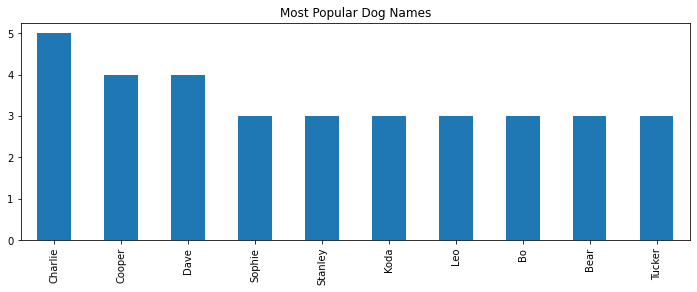

In [61]:
combined_df['name'].value_counts().head(10).plot.bar(figsize=(12,4))
plt.title("Most Popular Dog Names");

##### Inisght 3

In [57]:
#Checking top favorite count
combined_df.nlargest(3,'favorite_count')

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
219,807106840509214720,2016-12-09 06:17:20 +0000,Twitter for Iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,True,toy_terrier,0.077008,True,113526,52619,Fri Dec 09 06:17:20 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/DkBYaCAg2d
61,866450705531457537,2017-05-22 00:28:40 +0000,Twitter for Iphone,This is Jamesy. He gives a kiss to every other...,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,...,True,pug,0.001771,True,110521,30759,Mon May 22 00:28:40 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/wk7TfysWHr
32,879415818425184262,2017-06-26 19:07:24 +0000,Twitter for Iphone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,...,True,cardigan,0.110481,True,94265,38058,Mon Jun 26 19:07:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY


In [58]:
#Checking top retweet count
combined_df.nlargest(3,'retweet_count')

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,...,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,created_at,source_y,retweeted_status,url
219,807106840509214720,2016-12-09 06:17:20 +0000,Twitter for Iphone,This is Stephan. He just wants to help. 13/10 ...,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,NaN,https://pbs.twimg.com/ext_tw_video_thumb/80710...,...,True,toy_terrier,0.077008,True,113526,52619,Fri Dec 09 06:17:20 +0000 2016,Twitter for iPhone,Original tweet,https://t.co/DkBYaCAg2d
32,879415818425184262,2017-06-26 19:07:24 +0000,Twitter for Iphone,This is Duddles. He did an attempt. 13/10 some...,https://twitter.com/dog_rates/status/879415818...,13,10,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,...,True,cardigan,0.110481,True,94265,38058,Mon Jun 26 19:07:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/UDT7ZkcTgY
173,819004803107983360,2017-01-11 02:15:36 +0000,Twitter for Iphone,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,...,True,tibetan_terrier,0.094759,True,83899,35124,Wed Jan 11 02:15:36 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/AdPKrI8BZ1
